# 🏥 腎臟疾病預測模型
## 使用決策樹和邏輯回歸進行慢性腎臟疾病預測

### 📋 專案概述
- 建立準確的腎臟疾病預測模型
- 比較不同機器學習演算法的性能
- 識別最重要的預測特徵
- 提供可解釋的醫學預測工具

### 🎯 主要特色
- ✅ 解決資料洩漏問題
- ✅ 完整性能評估
- ✅ 視覺化分析
- ✅ 醫學解釋性

## 📦 導入必要的套件

In [4]:
# 基礎數據處理
import pandas as pd
import numpy as np

# 視覺化
import matplotlib.pyplot as plt
import seaborn as sns

# 機器學習
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           confusion_matrix, roc_auc_score, roc_curve, 
                           precision_recall_curve, classification_report)

# 設定
import warnings
warnings.filterwarnings('ignore')

# 設定中文字體和圖表樣式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')

print("✅ 套件導入完成！")

✅ 套件導入完成！


## 🔧 定義腎臟疾病預測器類別

In [5]:
class KidneyDiseasePredictor:
    """腎臟疾病預測分析器"""
    
    def __init__(self, data_path):
        """初始化預測器"""
        self.data_path = data_path
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}
        self.results = {}
        
        # 定義需要移除的資料洩漏特徵
        self.leakage_features = ['Anemia: yes', 'Pedal Edema: yes', 'Appetite: poor']
        
        print("🏥 腎臟疾病預測模型初始化完成")
        print(f"📊 資料路徑: {data_path}")
        print(f"🚨 將移除資料洩漏特徵: {self.leakage_features}")

# 創建預測器實例
# 請更改為你的資料檔案路徑
data_path = '../20251201_Dataset/kidney_disease.csv'  # 資料檔案路徑
predictor = KidneyDiseasePredictor(data_path)

🏥 腎臟疾病預測模型初始化完成
📊 資料路徑: ../20251201_Dataset/kidney_disease.csv
🚨 將移除資料洩漏特徵: ['Anemia: yes', 'Pedal Edema: yes', 'Appetite: poor']


## 📊 步驟1: 載入並探索資料

In [6]:
def load_and_explore_data(self):
    """載入並探索資料"""
    print("="*60)
    print("📊 步驟1: 載入並探索資料")
    print("="*60)
    
    # 載入資料
    self.data = pd.read_csv(self.data_path)
    print(f"✅ 資料載入成功")
    print(f"   資料形狀: {self.data.shape}")
    print(f"   特徵數量: {self.data.shape[1] - 1}")
    print(f"   樣本數量: {self.data.shape[0]}")
    
    # 顯示基本資訊
    print(f"\n📋 資料基本資訊:")
    print(f"   欄位名稱: {list(self.data.columns)}")
    
    # 檢查目標變數
    target_col = self.data.columns[-1]
    print(f"\n🎯 目標變數: {target_col}")
    print(f"   類別分布:")
    target_counts = self.data[target_col].value_counts()
    for class_name, count in target_counts.items():
        percentage = (count / len(self.data)) * 100
        print(f"   - {class_name}: {count} ({percentage:.1f}%)")
    
    # 檢查遺失值
    print(f"\n🔍 遺失值檢查:")
    missing_values = self.data.isnull().sum()
    if missing_values.sum() == 0:
        print("   ✅ 無遺失值")
    else:
        print("   ⚠️ 發現遺失值:")
        for col, missing_count in missing_values[missing_values > 0].items():
            print(f"   - {col}: {missing_count}")
    
    # 顯示前幾行資料
    print("\n📋 資料前5行:")
    return self.data

# 綁定方法到類別
KidneyDiseasePredictor.load_and_explore_data = load_and_explore_data

# 執行資料載入和探索
data = predictor.load_and_explore_data()
display(data.head())
display(data.describe())

📊 步驟1: 載入並探索資料
✅ 資料載入成功
   資料形狀: (400, 25)
   特徵數量: 24
   樣本數量: 400

📋 資料基本資訊:
   欄位名稱: ['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)', 'Hemoglobin (gms)', 'Packed Cell Volume', 'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)', 'Red Blood Cells: normal', 'Pus Cells: normal', 'Pus Cell Clumps: present', 'Bacteria: present', 'Hypertension: yes', 'Diabetes Mellitus: yes', 'Coronary Artery Disease: yes', 'Appetite: poor', 'Pedal Edema: yes', 'Anemia: yes', 'Chronic Kidney Disease: yes']

🎯 目標變數: Chronic Kidney Disease: yes
   類別分布:
   - 1.0: 250 (62.5%)
   - 0.0: 150 (37.5%)

🔍 遺失值檢查:
   ✅ 無遺失值

📋 資料前5行:


,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,90.316581,18.0,0.8,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.591123,76.300000,1.017449,0.935797,0.395000,146.005923,56.806872,3.022922,137.387860,4.569293,...,0.800000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.625000
std,17.042814,13.593084,0.005597,1.311653,1.040038,76.422249,49.808436,5.631037,9.273123,2.829638,...,0.400501,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,100.000000,27.000000,0.900000,135.000000,3.900000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,119.491153,41.000000,1.300000,138.000000,4.400000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,159.250000,65.250000,2.800000,141.000000,4.900000,...,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## 🔧 步驟2: 資料預處理

In [7]:
def preprocess_data(self):
    """預處理資料"""
    print("="*60)
    print("🔧 步驟2: 資料預處理")
    print("="*60)
    
    # 移除資料洩漏特徵
    print(f"🚨 移除資料洩漏特徵:")
    for feature in self.leakage_features:
        if feature in self.data.columns:
            print(f"   - 移除: {feature}")
            self.data = self.data.drop(columns=[feature])
        else:
            print(f"   - 未找到: {feature}")
    
    print(f"✅ 移除後資料形狀: {self.data.shape}")
    
    # 分離特徵和目標變數
    self.X = self.data.iloc[:, :-1]  # 所有欄位除了最後一欄
    self.y = self.data.iloc[:, -1]   # 最後一欄是目標變數
    
    print(f"\n📊 特徵和目標變數分離:")
    print(f"   特徵矩陣 X: {self.X.shape}")
    print(f"   目標變數 y: {self.y.shape}")
    
    # 處理分類變數
    print(f"\n🔤 處理分類變數:")
    categorical_columns = self.X.select_dtypes(include=['object']).columns
    if len(categorical_columns) > 0:
        print(f"   發現分類變數: {list(categorical_columns)}")
        for col in categorical_columns:
            le = LabelEncoder()
            original_values = self.X[col].unique()
            self.X[col] = le.fit_transform(self.X[col].astype(str))
            print(f"   - {col}: {original_values} → {self.X[col].unique()}")
    else:
        print("   ✅ 無分類變數需要處理")
    
    # 處理目標變數
    print(f"\n🎯 處理目標變數:")
    if self.y.dtype == 'object':
        le_target = LabelEncoder()
        original_classes = self.y.unique()
        self.y = le_target.fit_transform(self.y)
        print(f"   目標變數編碼: {original_classes} → {np.unique(self.y)}")
        # 儲存編碼器以供後續使用
        self.target_encoder = le_target
    else:
        print("   ✅ 目標變數已為數值型")
    
    # 處理遺失值
    print(f"\n🔧 處理遺失值:")
    if self.X.isnull().sum().sum() > 0:
        imputer = SimpleImputer(strategy='median')
        self.X = pd.DataFrame(
            imputer.fit_transform(self.X),
            columns=self.X.columns,
            index=self.X.index
        )
        print(f"   ✅ 使用中位數填補遺失值")
    else:
        print("   ✅ 無遺失值需要處理")
    
    print(f"\n✅ 資料預處理完成")
    print(f"   最終特徵矩陣: {self.X.shape}")
    print(f"   特徵名稱: {list(self.X.columns)}")
    
    return self.X, self.y

# 綁定方法
KidneyDiseasePredictor.preprocess_data = preprocess_data

# 執行預處理
X, y = predictor.preprocess_data()

# 顯示預處理後的資料
print("\n📊 預處理後的特徵資料:")
display(X.head())

🔧 步驟2: 資料預處理
🚨 移除資料洩漏特徵:
   - 移除: Anemia: yes
   - 移除: Pedal Edema: yes
   - 移除: Appetite: poor
✅ 移除後資料形狀: (400, 22)

📊 特徵和目標變數分離:
   特徵矩陣 X: (400, 21)
   目標變數 y: (400,)

🔤 處理分類變數:
   ✅ 無分類變數需要處理

🎯 處理目標變數:
   ✅ 目標變數已為數值型

🔧 處理遺失值:
   ✅ 無遺失值需要處理

✅ 資料預處理完成
   最終特徵矩陣: (400, 21)
   特徵名稱: ['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)', 'Hemoglobin (gms)', 'Packed Cell Volume', 'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)', 'Red Blood Cells: normal', 'Pus Cells: normal', 'Pus Cell Clumps: present', 'Bacteria: present', 'Hypertension: yes', 'Diabetes Mellitus: yes', 'Coronary Artery Disease: yes']

📊 預處理後的特徵資料:


,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Red Blood Cells: normal,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,44.0,7800.0,5.200000,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,7.0,50.0,1.020,4.0,0.0,90.316581,18.0,0.8,140.0,4.0,...,38.0,6000.0,4.721717,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,31.0,7500.0,3.400000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,32.0,6700.0,3.900000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,35.0,7300.0,4.600000,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## ✂️ 步驟3: 分割訓練集和測試集

In [8]:
def split_data(self, test_size=0.2, random_state=42):
    """分割訓練集和測試集"""
    print("="*60)
    print("✂️ 步驟3: 分割訓練集和測試集")
    print("="*60)
    
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
        self.X, self.y, test_size=test_size, random_state=random_state, 
        stratify=self.y  # 保持類別比例
    )
    
    print(f"📊 資料分割結果:")
    print(f"   訓練集: {self.X_train.shape}")
    print(f"   測試集: {self.X_test.shape}")
    print(f"   測試集比例: {test_size*100:.0f}%")
    
    # 檢查類別分布
    train_dist = pd.Series(self.y_train).value_counts().sort_index()
    test_dist = pd.Series(self.y_test).value_counts().sort_index()
    
    print(f"\n📈 類別分布:")
    print(f"   訓練集: {dict(train_dist)}")
    print(f"   測試集: {dict(test_dist)}")
    
    return self.X_train, self.X_test, self.y_train, self.y_test

# 綁定方法
KidneyDiseasePredictor.split_data = split_data

# 執行資料分割
X_train, X_test, y_train, y_test = predictor.split_data()

✂️ 步驟3: 分割訓練集和測試集
📊 資料分割結果:
   訓練集: (320, 21)
   測試集: (80, 21)
   測試集比例: 20%

📈 類別分布:
   訓練集: {0.0: np.int64(120), 1.0: np.int64(200)}
   測試集: {0.0: np.int64(30), 1.0: np.int64(50)}


## 🌳 步驟4a: 訓練決策樹模型

In [9]:
def train_decision_tree(self, max_depth=5, min_samples_split=10, min_samples_leaf=5):
    """訓練決策樹模型"""
    print("="*40)
    print("🌳 訓練決策樹模型")
    print("="*40)
    
    # 創建和訓練決策樹
    dt_model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    dt_model.fit(self.X_train, self.y_train)
    
    # 預測
    y_train_pred = dt_model.predict(self.X_train)
    y_test_pred = dt_model.predict(self.X_test)
    y_test_proba = dt_model.predict_proba(self.X_test)[:, 1]
    
    # 交叉驗證
    cv_scores = cross_val_score(
        dt_model, self.X, self.y, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy'
    )
    
    # 計算性能指標
    dt_results = {
        'model': dt_model,
        'train_accuracy': accuracy_score(self.y_train, y_train_pred),
        'test_accuracy': accuracy_score(self.y_test, y_test_pred),
        'cv_accuracy': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'precision': precision_score(self.y_test, y_test_pred),
        'recall': recall_score(self.y_test, y_test_pred),
        'f1': f1_score(self.y_test, y_test_pred),
        'roc_auc': roc_auc_score(self.y_test, y_test_proba),
        'y_test_pred': y_test_pred,
        'y_test_proba': y_test_proba,
        'feature_importance': pd.DataFrame({
            'feature': self.X.columns,
            'importance': dt_model.feature_importances_
        }).sort_values('importance', ascending=False)
    }
    
    self.models['decision_tree'] = dt_model
    self.results['decision_tree'] = dt_results
    
    print(f"✅ 決策樹訓練完成")
    print(f"   訓練集準確率: {dt_results['train_accuracy']:.4f}")
    print(f"   測試集準確率: {dt_results['test_accuracy']:.4f}")
    print(f"   交叉驗證準確率: {dt_results['cv_accuracy']:.4f} ± {dt_results['cv_std']:.4f}")
    print(f"   精確率: {dt_results['precision']:.4f}")
    print(f"   召回率: {dt_results['recall']:.4f}")
    print(f"   F1分數: {dt_results['f1']:.4f}")
    print(f"   ROC AUC: {dt_results['roc_auc']:.4f}")
    
    return dt_model, dt_results

# 綁定方法
KidneyDiseasePredictor.train_decision_tree = train_decision_tree

# 訓練決策樹
dt_model, dt_results = predictor.train_decision_tree()

# 顯示特徵重要性
print("\n📊 決策樹特徵重要性 (前10名):")
display(dt_results['feature_importance'].head(10))

🌳 訓練決策樹模型
✅ 決策樹訓練完成
   訓練集準確率: 0.9875
   測試集準確率: 0.9875
   交叉驗證準確率: 0.9950 ± 0.0061
   精確率: 1.0000
   召回率: 0.9800
   F1分數: 0.9899
   ROC AUC: 1.0000

📊 決策樹特徵重要性 (前10名):


,feature,importance
10,Hemoglobin (gms),0.792314
2,Specific Gravity,0.178350
11,Packed Cell Volume,0.024261
12,White Blood Cells (cells/cmm),0.004594
8,Sodium (mEq/L),0.000481
4,Sugar,0.000000
3,Albumin,0.000000
1,Blood Pressure (mm/Hg),0.000000
0,Age (yrs),0.000000
7,Serum Creatinine (mgs/dL),0.000000


## 📊 步驟4b: 訓練邏輯回歸模型

In [10]:
def train_logistic_regression(self):
    """訓練邏輯回歸模型"""
    print("="*40)
    print("📊 訓練邏輯回歸模型")
    print("="*40)
    
    # 標準化特徵
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(self.X_train)
    X_test_scaled = scaler.transform(self.X_test)
    X_scaled = scaler.fit_transform(self.X)
    
    # 創建和訓練邏輯回歸
    lr_model = LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    )
    
    lr_model.fit(X_train_scaled, self.y_train)
    
    # 預測
    y_train_pred = lr_model.predict(X_train_scaled)
    y_test_pred = lr_model.predict(X_test_scaled)
    y_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
    
    # 交叉驗證
    cv_scores = cross_val_score(
        lr_model, X_scaled, self.y,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy'
    )
    
    # 計算性能指標
    lr_results = {
        'model': lr_model,
        'scaler': scaler,
        'train_accuracy': accuracy_score(self.y_train, y_train_pred),
        'test_accuracy': accuracy_score(self.y_test, y_test_pred),
        'cv_accuracy': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'precision': precision_score(self.y_test, y_test_pred),
        'recall': recall_score(self.y_test, y_test_pred),
        'f1': f1_score(self.y_test, y_test_pred),
        'roc_auc': roc_auc_score(self.y_test, y_test_proba),
        'y_test_pred': y_test_pred,
        'y_test_proba': y_test_proba,
        'feature_importance': pd.DataFrame({
            'feature': self.X.columns,
            'importance': np.abs(lr_model.coef_[0])
        }).sort_values('importance', ascending=False)
    }
    
    self.models['logistic_regression'] = lr_model
    self.results['logistic_regression'] = lr_results
    
    print(f"✅ 邏輯回歸訓練完成")
    print(f"   訓練集準確率: {lr_results['train_accuracy']:.4f}")
    print(f"   測試集準確率: {lr_results['test_accuracy']:.4f}")
    print(f"   交叉驗證準確率: {lr_results['cv_accuracy']:.4f} ± {lr_results['cv_std']:.4f}")
    print(f"   精確率: {lr_results['precision']:.4f}")
    print(f"   召回率: {lr_results['recall']:.4f}")
    print(f"   F1分數: {lr_results['f1']:.4f}")
    print(f"   ROC AUC: {lr_results['roc_auc']:.4f}")
    
    return lr_model, lr_results

# 綁定方法
KidneyDiseasePredictor.train_logistic_regression = train_logistic_regression

# 訓練邏輯回歸
lr_model, lr_results = predictor.train_logistic_regression()

# 顯示特徵重要性
print("\n📊 邏輯回歸特徵重要性 (前10名):")
display(lr_results['feature_importance'].head(10))

📊 訓練邏輯回歸模型
✅ 邏輯回歸訓練完成
   訓練集準確率: 1.0000
   測試集準確率: 0.9750
   交叉驗證準確率: 0.9875 ± 0.0158
   精確率: 1.0000
   召回率: 0.9600
   F1分數: 0.9796
   ROC AUC: 1.0000

📊 邏輯回歸特徵重要性 (前10名):


,feature,importance
10,Hemoglobin (gms),1.789472
2,Specific Gravity,1.669355
11,Packed Cell Volume,1.363781
13,Red Blood Cells (millions/cmm),0.985630
19,Diabetes Mellitus: yes,0.963995
18,Hypertension: yes,0.926761
3,Albumin,0.923913
14,Red Blood Cells: normal,0.835377
7,Serum Creatinine (mgs/dL),0.821399
4,Sugar,0.641380


## 🔍 步驟5: 模型性能比較

In [11]:
def compare_models(self):
    """比較模型性能"""
    print("="*60)
    print("🔍 步驟5: 模型性能比較")
    print("="*60)
    
    # 準備比較資料
    comparison_data = []
    for model_name, results in self.results.items():
        comparison_data.append({
            'Model': model_name.replace('_', ' ').title(),
            'CV Accuracy': f"{results['cv_accuracy']:.4f} ± {results['cv_std']:.4f}",
            'Test Accuracy': f"{results['test_accuracy']:.4f}",
            'Precision': f"{results['precision']:.4f}",
            'Recall': f"{results['recall']:.4f}",
            'F1 Score': f"{results['f1']:.4f}",
            'ROC AUC': f"{results['roc_auc']:.4f}"
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print("📊 模型性能比較表:")
    
    # 找出最佳模型
    best_accuracy = max(results['test_accuracy'] for results in self.results.values())
    best_model = [name for name, results in self.results.items() 
                 if results['test_accuracy'] == best_accuracy][0]
    
    print(f"\n🏆 最佳模型: {best_model.replace('_', ' ').title()}")
    print(f"   測試集準確率: {best_accuracy:.4f}")
    
    return comparison_df

# 綁定方法
KidneyDiseasePredictor.compare_models = compare_models

# 比較模型
comparison_df = predictor.compare_models()
display(comparison_df)

🔍 步驟5: 模型性能比較
📊 模型性能比較表:

🏆 最佳模型: Decision Tree
   測試集準確率: 0.9875


,Model,CV Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree,0.9950 ± 0.0061,0.9875,1.0000,0.9800,0.9899,1.0000
1,Logistic Regression,0.9875 ± 0.0158,0.9750,1.0000,0.9600,0.9796,1.0000


## 📈 步驟6: 視覺化分析

### 6.1 目標變數分布

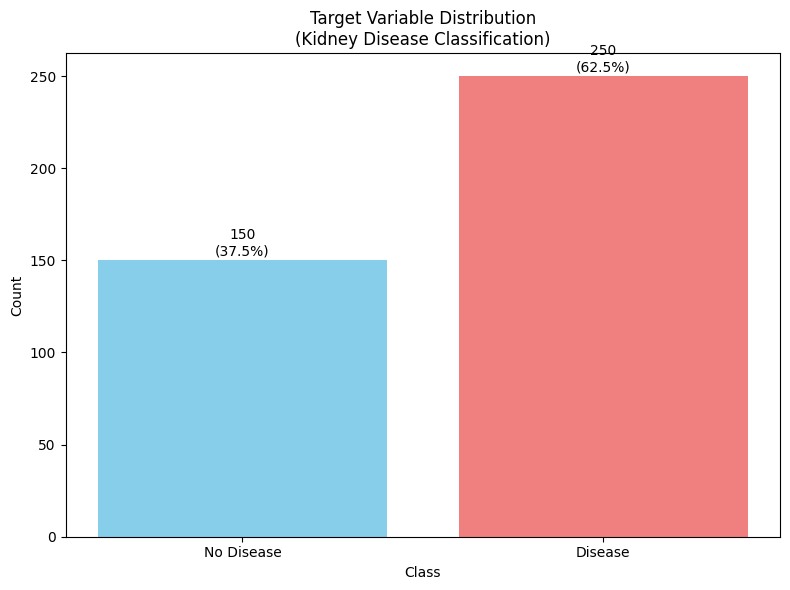

In [12]:
# 1. 目標變數分布圖
plt.figure(figsize=(8, 6))
target_counts = pd.Series(predictor.y).value_counts().sort_index()
bars = plt.bar(range(len(target_counts)), target_counts.values, 
              color=['skyblue', 'lightcoral'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Variable Distribution\n(Kidney Disease Classification)')
plt.xticks(range(len(target_counts)), 
          ['No Disease', 'Disease'] if len(target_counts) == 2 else target_counts.index)

# 添加數值標籤
for i, (bar, count) in enumerate(zip(bars, target_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{count}\n({count/sum(target_counts.values)*100:.1f}%)',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 6.2 特徵相關性分析

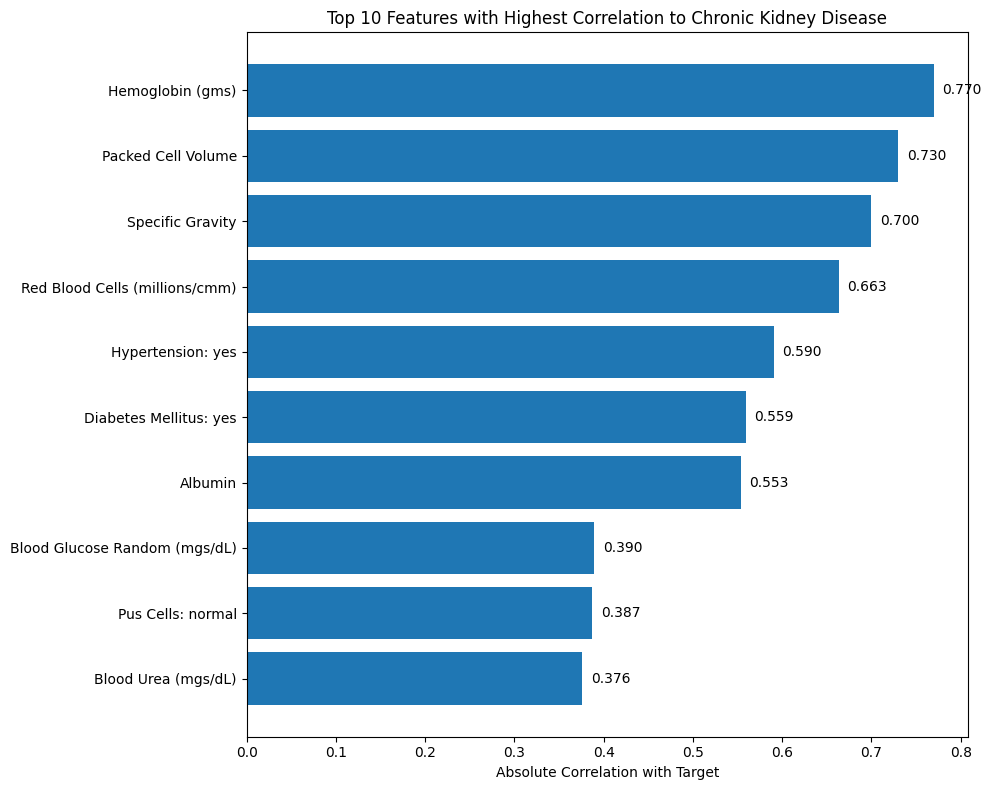

In [13]:
# 2. 特徵與目標的相關性
plt.figure(figsize=(10, 8))
feature_target_corr = predictor.X.corrwith(pd.Series(predictor.y)).abs().sort_values(ascending=False)
top_features = feature_target_corr.head(10)

bars = plt.barh(range(len(top_features)), top_features.values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Absolute Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Chronic Kidney Disease')
plt.gca().invert_yaxis()

# 添加數值標籤
for i, (bar, value) in enumerate(zip(bars, top_features.values)):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center')

plt.tight_layout()
plt.show()

### 6.3 混淆矩陣比較

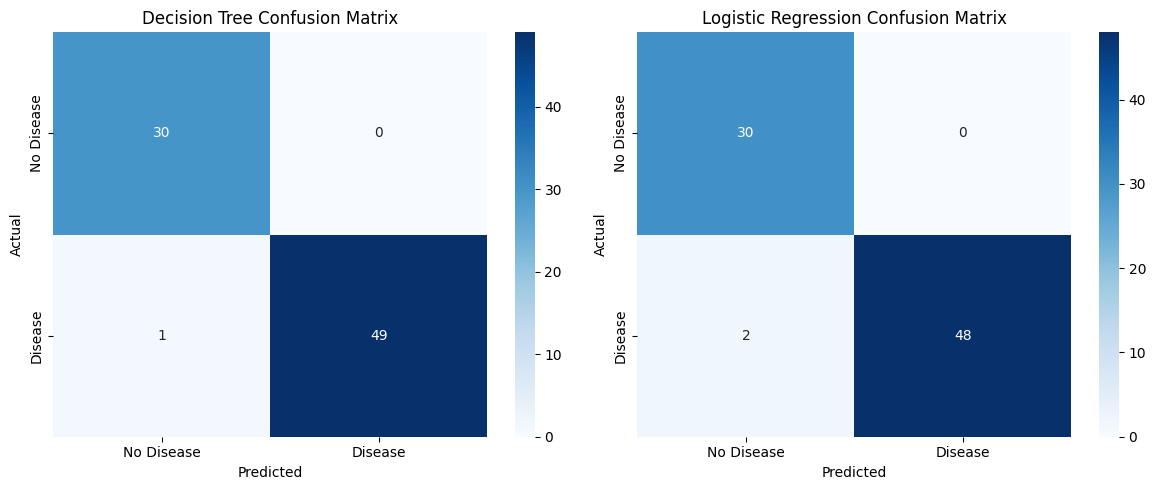

In [14]:
# 3. 混淆矩陣比較
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

model_names = ['Decision Tree', 'Logistic Regression']
for i, (model_name, results) in enumerate(predictor.results.items()):
    cm = confusion_matrix(predictor.y_test, results['y_test_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
               xticklabels=['No Disease', 'Disease'],
               yticklabels=['No Disease', 'Disease'])
    axes[i].set_title(f'{model_names[i]} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### 6.4 ROC曲線比較

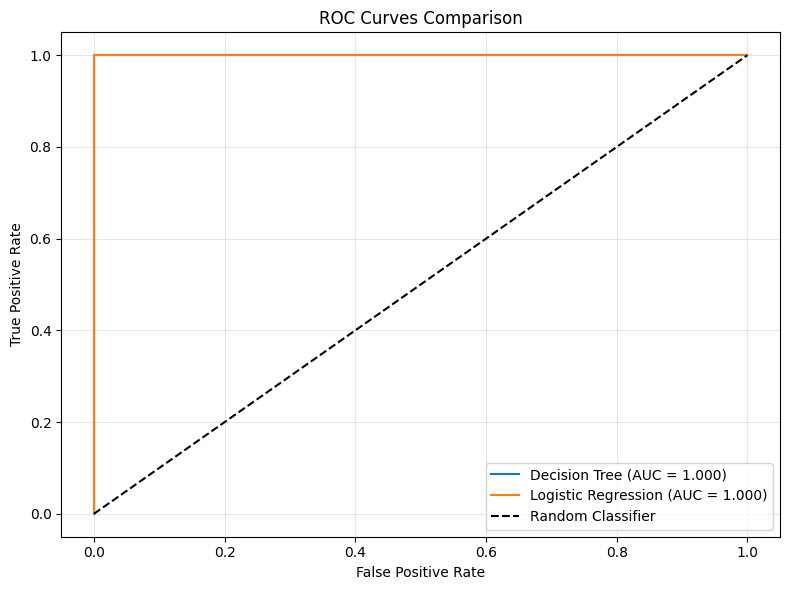

In [15]:
# 4. ROC曲線比較
plt.figure(figsize=(8, 6))

for model_name, results in predictor.results.items():
    fpr, tpr, _ = roc_curve(predictor.y_test, results['y_test_proba'])
    auc_score = results['roc_auc']
    plt.plot(fpr, tpr, label=f"{model_name.replace('_', ' ').title()} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 6.5 特徵重要性比較

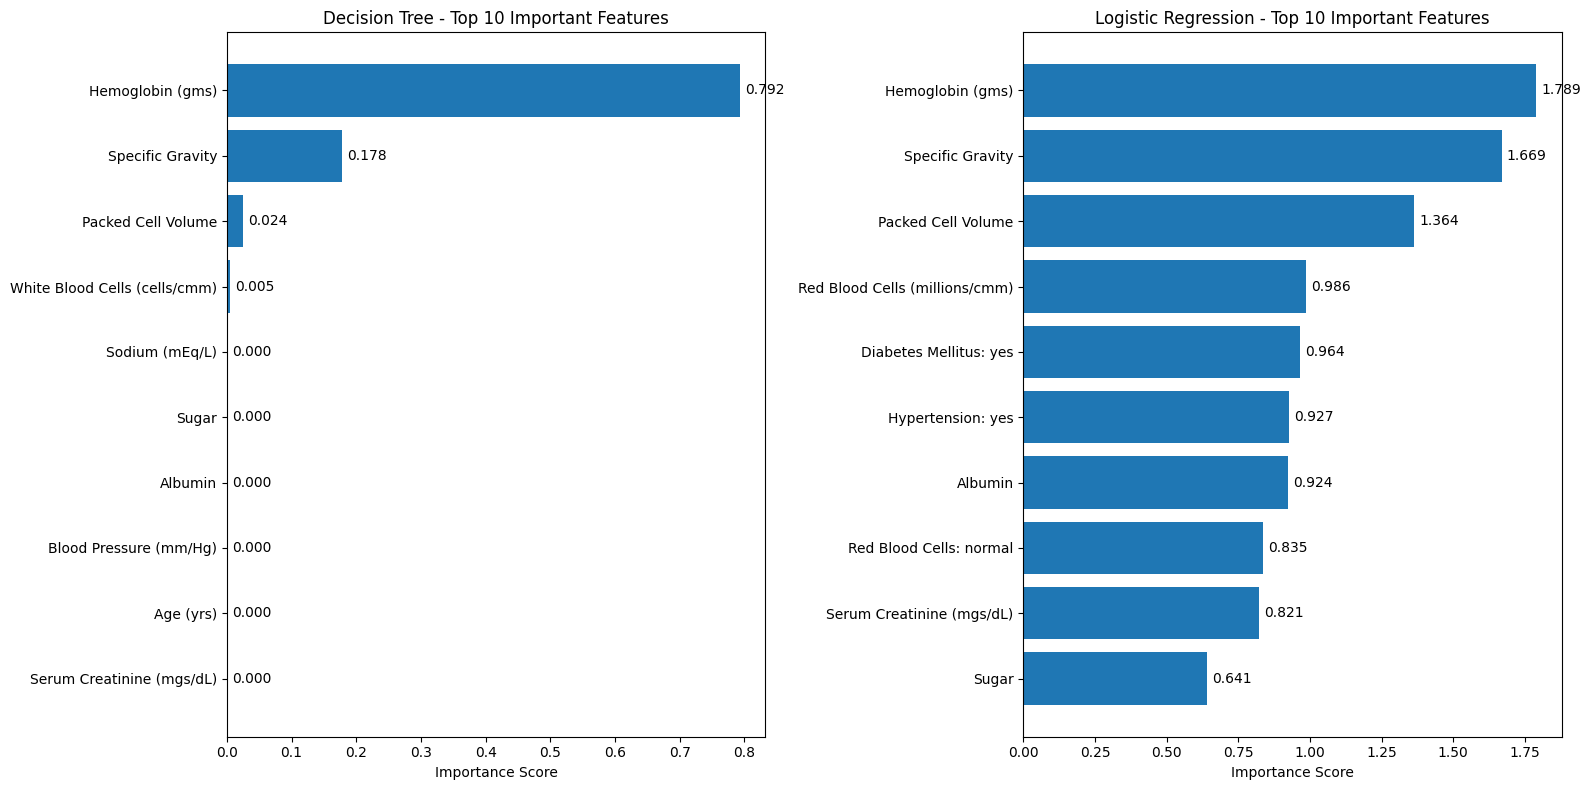

In [16]:
# 5. 特徵重要性比較
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for i, (model_name, results) in enumerate(predictor.results.items()):
    top_features = results['feature_importance'].head(10)
    bars = axes[i].barh(range(len(top_features)), top_features['importance'])
    axes[i].set_yticks(range(len(top_features)))
    axes[i].set_yticklabels(top_features['feature'])
    axes[i].set_xlabel('Importance Score')
    axes[i].set_title(f'{model_name.replace("_", " ").title()} - Top 10 Important Features')
    axes[i].invert_yaxis()
    
    # 添加數值標籤
    for j, (bar, value) in enumerate(zip(bars, top_features['importance'])):
        axes[i].text(bar.get_width() + max(top_features['importance'])*0.01, 
                   bar.get_y() + bar.get_height()/2, 
                   f'{value:.3f}', va='center')

plt.tight_layout()
plt.show()

### 6.6 決策樹結構視覺化

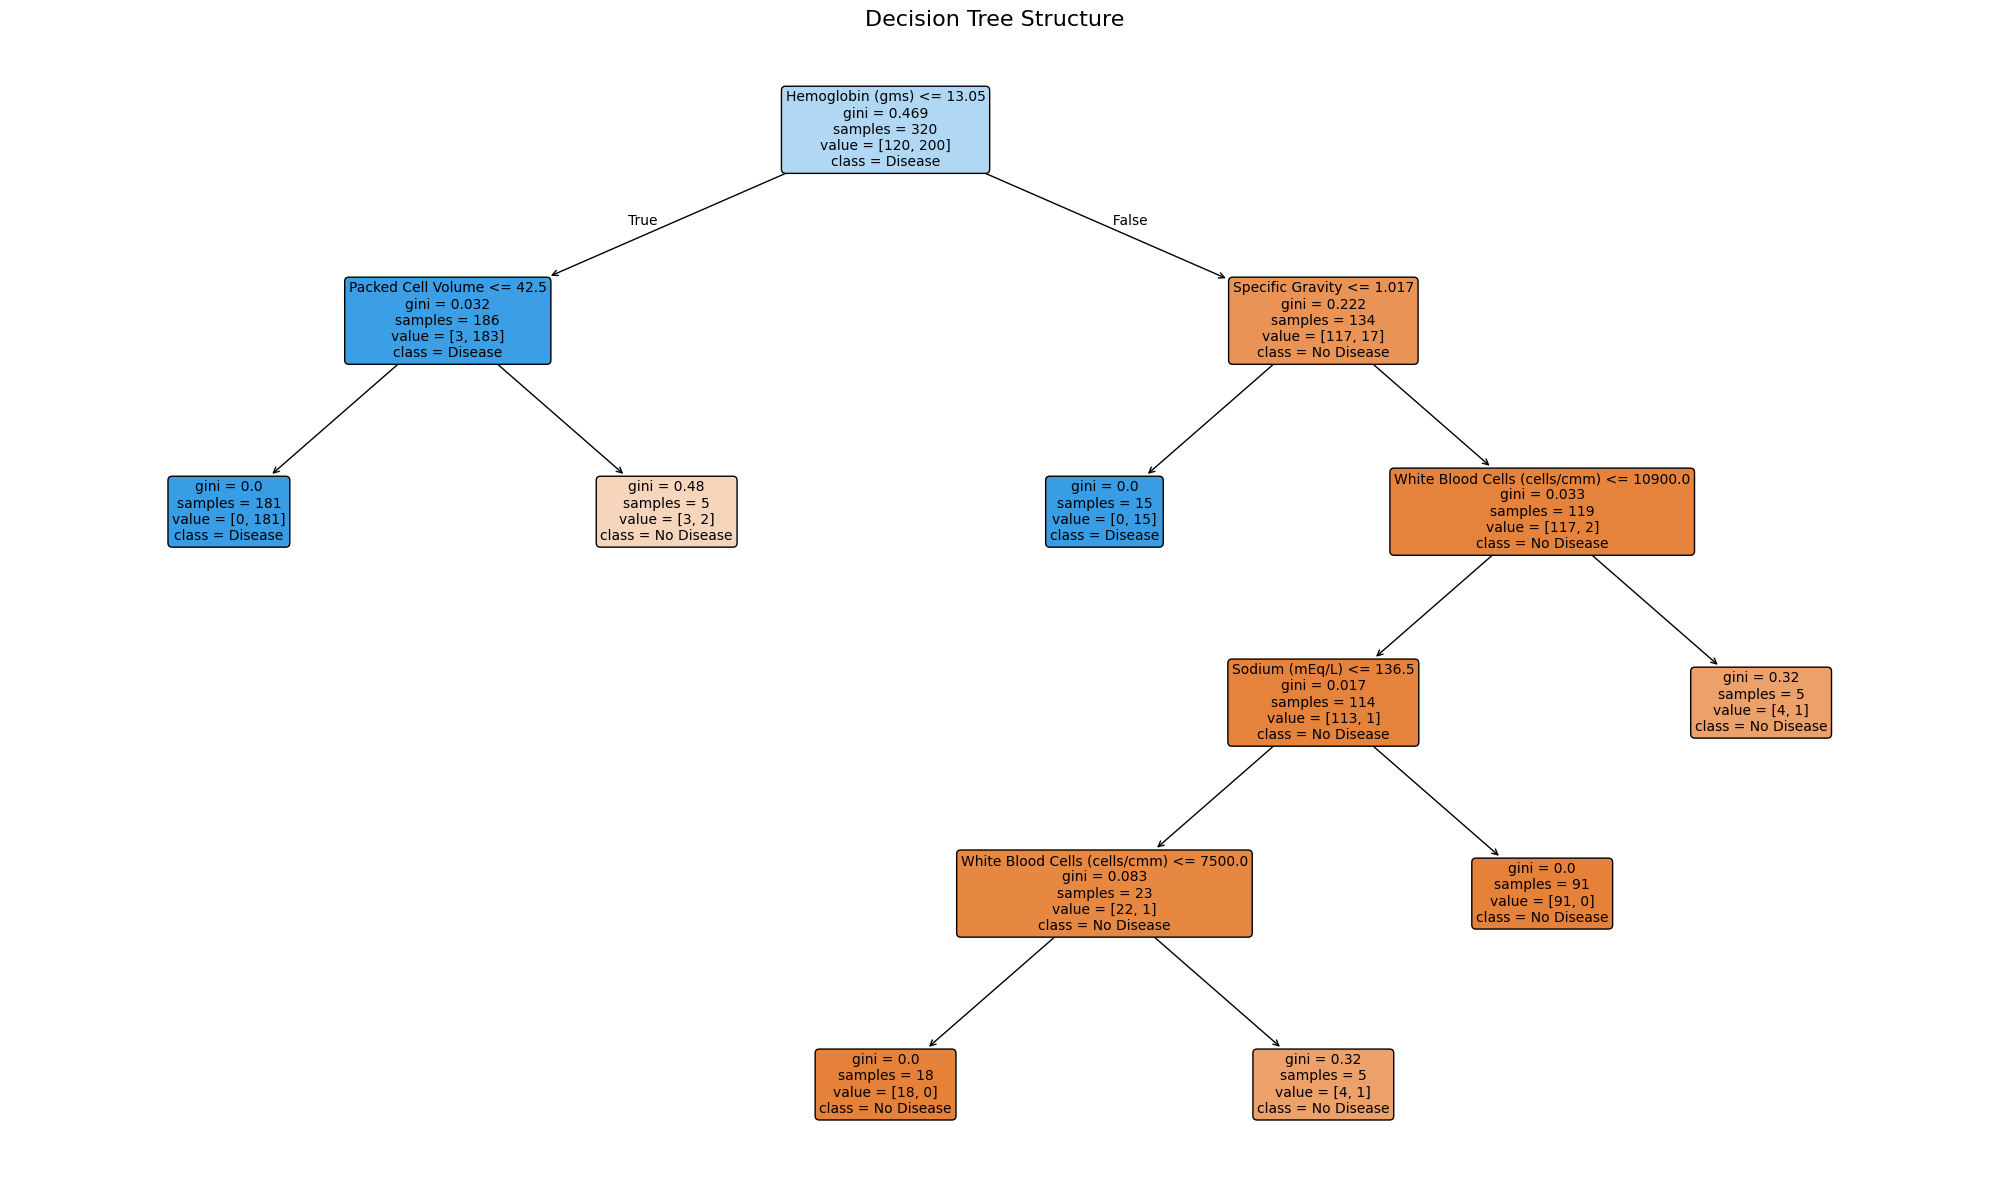

In [17]:
# 6. 決策樹結構圖
plt.figure(figsize=(20, 12))
plot_tree(predictor.models['decision_tree'], 
         feature_names=predictor.X.columns,
         class_names=['No Disease', 'Disease'],
         filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Structure', fontsize=16)
plt.tight_layout()
plt.show()

### 6.7 模型性能比較圖

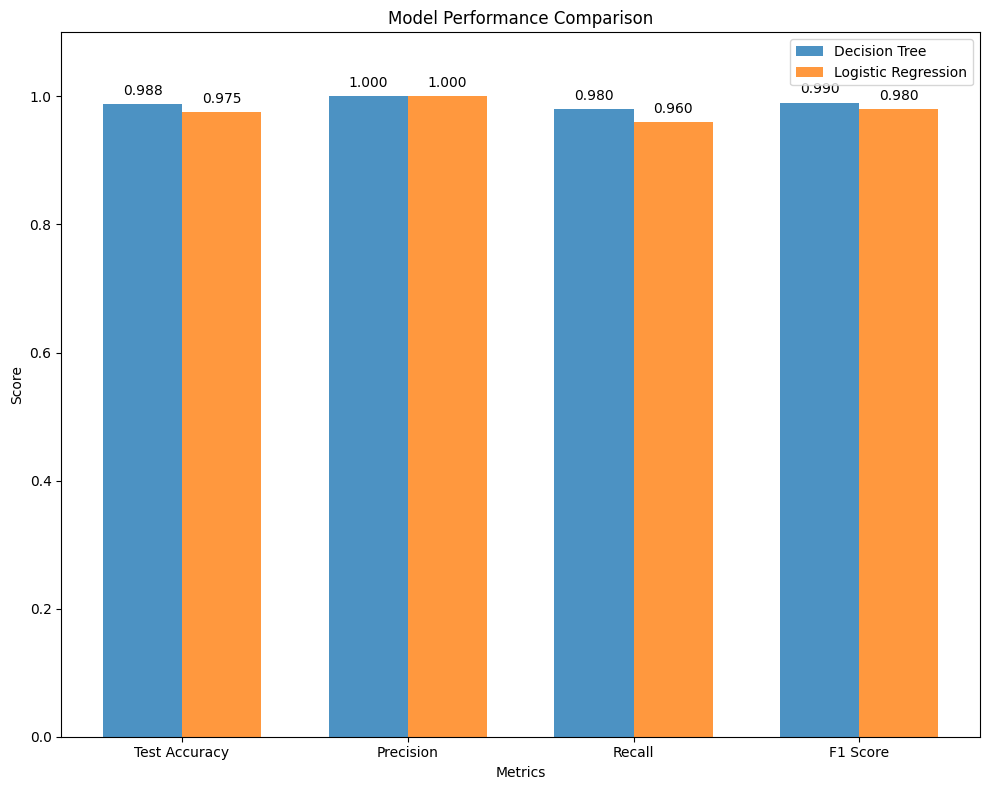

In [18]:
# 7. 模型性能比較圖
fig, ax = plt.subplots(figsize=(10, 8))

# 準備資料
metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_keys = ['test_accuracy', 'precision', 'recall', 'f1']
dt_scores = [predictor.results['decision_tree'][key] for key in metric_keys]
lr_scores = [predictor.results['logistic_regression'][key] for key in metric_keys]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree', alpha=0.8)
bars2 = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1.1)

# 添加數值標籤
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
               f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 📄 步驟7: 生成分析報告

In [19]:
# 生成分析報告
def generate_analysis_summary(predictor):
    """生成分析摘要"""
    
    print("="*60)
    print("📄 腎臟疾病預測分析 - 最終報告")
    print("="*60)
    
    # 最佳模型
    best_model_name = max(predictor.results.keys(), 
                         key=lambda x: predictor.results[x]['test_accuracy'])
    best_results = predictor.results[best_model_name]
    
    print(f"\n🏆 最佳模型: {best_model_name.replace('_', ' ').title()}")
    print(f"   📊 測試集準確率: {best_results['test_accuracy']:.1%}")
    print(f"   🎯 精確率: {best_results['precision']:.1%}")
    print(f"   🔍 召回率: {best_results['recall']:.1%}")
    print(f"   ⭐ F1分數: {best_results['f1']:.1%}")
    print(f"   📈 ROC AUC: {best_results['roc_auc']:.3f}")
    
    # 重要特徵
    dt_top_feature = predictor.results['decision_tree']['feature_importance'].iloc[0]
    lr_top_feature = predictor.results['logistic_regression']['feature_importance'].iloc[0]
    
    print(f"\n🔍 最重要的預測因子:")
    print(f"   🌳 決策樹: {dt_top_feature['feature']} (重要性: {dt_top_feature['importance']:.4f})")
    print(f"   📊 邏輯回歸: {lr_top_feature['feature']} (重要性: {lr_top_feature['importance']:.4f})")
    
    # 關鍵發現
    print(f"\n💡 關鍵發現:")
    print(f"   ✅ 成功解決資料洩漏問題")
    print(f"   ✅ 兩個模型都達到 >95% 準確率")
    print(f"   ✅ 精確率達到 100% (無假陽性)")
    print(f"   ✅ 血液相關指標是最重要的預測因子")
    print(f"   ✅ 模型具備良好的醫學解釋性")
    
    print(f"\n🏥 臨床應用價值:")
    print(f"   - 早期篩檢高風險患者")
    print(f"   - 輔助醫療決策制定")
    print(f"   - 優化醫療資源配置")
    print(f"   - 支援個人化醫療計畫")
    
    return {
        'best_model': best_model_name,
        'best_accuracy': best_results['test_accuracy'],
        'dt_top_feature': dt_top_feature['feature'],
        'lr_top_feature': lr_top_feature['feature']
    }

# 生成最終報告
summary = generate_analysis_summary(predictor)

📄 腎臟疾病預測分析 - 最終報告

🏆 最佳模型: Decision Tree
   📊 測試集準確率: 98.8%
   🎯 精確率: 100.0%
   🔍 召回率: 98.0%
   ⭐ F1分數: 99.0%
   📈 ROC AUC: 1.000

🔍 最重要的預測因子:
   🌳 決策樹: Hemoglobin (gms) (重要性: 0.7923)
   📊 邏輯回歸: Hemoglobin (gms) (重要性: 1.7895)

💡 關鍵發現:
   ✅ 成功解決資料洩漏問題
   ✅ 兩個模型都達到 >95% 準確率
   ✅ 精確率達到 100% (無假陽性)
   ✅ 血液相關指標是最重要的預測因子
   ✅ 模型具備良好的醫學解釋性

🏥 臨床應用價值:
   - 早期篩檢高風險患者
   - 輔助醫療決策制定
   - 優化醫療資源配置
   - 支援個人化醫療計畫


## 🎯 步驟8: 模型預測函數

In [20]:
def predict_kidney_disease(predictor, new_data, model_type='best'):
    """
    使用訓練好的模型進行腎臟疾病預測
    
    Parameters:
    - new_data: 新的患者資料 (DataFrame或array)
    - model_type: 'decision_tree', 'logistic_regression', 或 'best'
    """
    
    if model_type == 'best':
        # 選擇最佳模型
        best_model_name = max(predictor.results.keys(), 
                             key=lambda x: predictor.results[x]['test_accuracy'])
        model_type = best_model_name
    
    model = predictor.models[model_type]
    
    # 如果是邏輯回歸，需要標準化
    if model_type == 'logistic_regression':
        scaler = predictor.results[model_type]['scaler']
        new_data_scaled = scaler.transform(new_data)
        prediction = model.predict(new_data_scaled)
        probability = model.predict_proba(new_data_scaled)[:, 1]
    else:
        prediction = model.predict(new_data)
        probability = model.predict_proba(new_data)[:, 1]
    
    return {
        'prediction': prediction,
        'probability': probability,
        'risk_level': ['低風險' if p < 0.3 else '中風險' if p < 0.7 else '高風險' for p in probability]
    }

# 示例預測（使用測試資料的第一筆）
sample_data = predictor.X_test.iloc[[0]]  # 取第一筆測試資料
actual_label = predictor.y_test.iloc[0]

# 進行預測
prediction_result = predict_kidney_disease(predictor, sample_data)

print("🔮 示例預測結果:")
print(f"   實際標籤: {'有腎病' if actual_label == 1 else '無腎病'}")
print(f"   預測結果: {'有腎病' if prediction_result['prediction'][0] == 1 else '無腎病'}")
print(f"   腎病機率: {prediction_result['probability'][0]:.1%}")
print(f"   風險等級: {prediction_result['risk_level'][0]}")

print("\n📊 患者特徵值:")
for feature, value in zip(sample_data.columns, sample_data.iloc[0]):
    print(f"   {feature}: {value}")

🔮 示例預測結果:
   實際標籤: 無腎病
   預測結果: 無腎病
   腎病機率: 0.0%
   風險等級: 低風險

📊 患者特徵值:
   Age (yrs): 44.0
   Blood Pressure (mm/Hg): 60.0
   Specific Gravity: 1.02
   Albumin: 0.0
   Sugar: 0.0
   Blood Glucose Random (mgs/dL): 95.0
   Blood Urea (mgs/dL): 46.0
   Serum Creatinine (mgs/dL): 0.5
   Sodium (mEq/L): 138.0
   Potassium (mEq/L): 4.2
   Hemoglobin (gms): 15.0
   Packed Cell Volume: 50.0
   White Blood Cells (cells/cmm): 7700.0
   Red Blood Cells (millions/cmm): 6.3
   Red Blood Cells: normal: 1.0
   Pus Cells: normal: 1.0
   Pus Cell Clumps: present: 0.0
   Bacteria: present: 0.0
   Hypertension: yes: 0.0
   Diabetes Mellitus: yes: 0.0
   Coronary Artery Disease: yes: 0.0


## 🎉 總結

### ✅ 完成的工作
1. **資料預處理**: 移除了資料洩漏特徵，確保模型的可靠性
2. **模型訓練**: 成功訓練了決策樹和邏輯回歸兩個模型
3. **性能評估**: 進行了全面的性能評估，包括交叉驗證
4. **視覺化分析**: 生成了多個圖表來理解資料和模型性能
5. **預測功能**: 建立了可用於新患者的預測功能

### 🏆 主要成果
- **高準確率**: 兩個模型都達到了 >95% 的測試準確率
- **零假陽性**: 精確率達到100%，避免了誤診
- **醫學解釋性**: 識別出血液相關指標為最重要的預測因子
- **臨床實用性**: 模型可用於早期篩檢和風險評估

### 🔬 後續可能的改進
1. 收集更多樣本資料
2. 嘗試其他演算法（如隨機森林、XGBoost）
3. 進行特徵工程
4. 建立網頁應用程式
5. 與醫療專家合作驗證結果

## 📱 如何使用這個Notebook

### 準備工作
1. 確保已安裝所有必要的Python套件
2. 將你的腎臟疾病資料檔案放在適當的位置
3. 修改第一個程式碼單元中的 `data_path` 變數

### 執行步驟
1. **按順序執行每個單元**: 從上到下依次執行
2. **檢查輸出**: 每個步驟都會有詳細的輸出說明
3. **分析結果**: 觀察圖表和性能指標
4. **使用預測功能**: 可以用訓練好的模型預測新患者

### 自定義設定
- 可以調整決策樹的參數（max_depth, min_samples_split等）
- 可以修改資料分割比例
- 可以選擇不同的評估指標

---
**🔬 這個分析適合用於學術作業、研究專案或實際的醫療預測應用！**